# Naive Bayes

## Import Modules and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving kohkiloyeh.csv to kohkiloyeh (1).csv


In [ ]:
df = pd.read_csv("kohkiloyeh.csv")
df

,Degree,caprice,topic,lmt,lpss,pb
0,high,left,impression,yes,yes,yes
1,high,left,political,yes,yes,yes
2,medium,middle,tourism,yes,yes,yes
3,high,left,political,yes,yes,yes
4,medium,middle,news,yes,yes,yes
...,...,...,...,...,...,...
95,medium,middle,impression,yes,yes,yes
96,low,middle,impression,yes,no,no
97,low,right,impression,yes,no,no
98,medium,right,news,yes,yes,no


## Data Preprocessing

In [ ]:
df.isnull().sum()

Degree     0
caprice    0
topic      0
lmt        0
lpss       0
pb         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Degree   100 non-null    object
 1   caprice  100 non-null    object
 2   topic    100 non-null    object
 3   lmt      100 non-null    object
 4   lpss     100 non-null    object
 5   pb       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [ ]:
d = {'yes' : 1, 'no' : 0}
df.lmt = df.lmt.map(d)
df.lpss = df.lpss.map(d)
df.pb = df.pb.map(d)
d = {'high': 2, 'medium': 1, 'low': 0}
df.Degree = df.Degree.map(d)
df

,Degree,caprice,topic,lmt,lpss,pb
0,2,left,impression,1,1,1
1,2,left,political,1,1,1
2,1,middle,tourism,1,1,1
3,2,left,political,1,1,1
4,1,middle,news,1,1,1
...,...,...,...,...,...,...
95,1,middle,impression,1,1,1
96,0,middle,impression,1,0,0
97,0,right,impression,1,0,0
98,1,right,news,1,1,0


In [ ]:
x = df.iloc[:,3:]
x

,lmt,lpss,pb
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
95,1,1,1
96,1,0,0
97,1,0,0
98,1,1,0


In [ ]:
dfDegree = df.Degree
dfDegree

0     2
1     2
2     1
3     2
4     1
     ..
95    1
96    0
97    0
98    1
99    1
Name: Degree, Length: 100, dtype: int64

In [ ]:
x= df
x

,lmt,lpss,pb
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
95,1,1,1
96,1,0,0
97,1,0,0
98,1,1,0


In [ ]:
y = dfDegree
y

0     2
1     2
2     1
3     2
4     1
     ..
95    1
96    0
97    0
98    1
99    1
Name: Degree, Length: 100, dtype: int64

### Training The Dataset

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

## Types Naive Bayes
1. Guassian
2. Bernouli
3. Multinomial
4. Complement
5. Categorical

In [ ]:
score= []

### Gussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(x)
cm = confusion_matrix(y, ypred)
ac = accuracy_score(y, ypred)
score.append(ac)
cm, ac

(array([[10,  2,  2],
        [ 5, 12, 30],
        [ 5,  6, 28]]), 0.5)

### Bernouli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(x)
cm = confusion_matrix(y, ypred)
ac = accuracy_score(y, ypred)
score.append(ac)
cm, ac

(array([[ 6,  8,  0],
        [ 0, 47,  0],
        [ 2, 37,  0]]), 0.53)

### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(x)
cm = confusion_matrix(y, ypred)
ac = accuracy_score(y, ypred)
score.append(ac)
cm , ac

(array([[ 0, 14,  0],
        [ 0, 47,  0],
        [ 0, 39,  0]]), 0.47)

### Complement Naive Bayes

In [ ]:
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(x)
cm = confusion_matrix(y, ypred)
ac = accuracy_score(y, ypred)
score.append(ac)
cm, ac

(array([[ 8,  4,  2],
        [10, 25, 12],
        [ 8, 25,  6]]), 0.39)

### Categorical Naive Bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB
classifier = CategoricalNB()
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(x)
cm = confusion_matrix(y, ypred)
ac = accuracy_score(y, ypred)
score.append(ac)
cm, ac

(array([[ 6,  8,  0],
        [ 0, 47,  0],
        [ 2, 37,  0]]), 0.53)

Text(0, 0.5, 'Score')

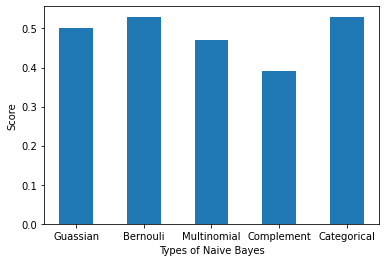

In [ ]:
names = ['Guassian','Bernouli','Multinomial','Complement','Categorical']
plt.bar(names, score ,width=0.5)
plt.xlabel('Types of Naive Bayes')
plt.ylabel('Score')

In [ ]:
score

[0.5, 0.53, 0.47, 0.39, 0.53]